In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import random

import neat

5


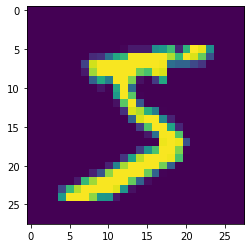

In [ ]:
#@title Dataset Parameters  { run: "auto" }
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
X, Y = x_train / 255.0, y_train

plt.imshow(X[0])
print(Y[0])

In [ ]:
%%writefile config
[NEAT]
fitness_criterion     = max
fitness_threshold     = .25
pop_size              = 100
reset_on_extinction   = 1

[DefaultGenome]
num_inputs              = 784
num_hidden              = 10
num_outputs             = 10
initial_connection      = full_direct
feed_forward            = True
compatibility_disjoint_coefficient    = 1.0
compatibility_weight_coefficient      = 0.6
conn_add_prob           = 0.2
conn_delete_prob        = 0.2
node_add_prob           = 0.2
node_delete_prob        = 0.2
activation_default      = relu
activation_options      = identity relu
activation_mutate_rate  = 0.0
aggregation_default     = sum
aggregation_options     = sum mean product min max median
aggregation_mutate_rate = 0.2
bias_init_mean          = 0.0
bias_init_stdev         = 1.0
bias_replace_rate       = 0.1
bias_mutate_rate        = 0.7
bias_mutate_power       = 0.5
bias_max_value          = 30.0
bias_min_value          = -30.0
response_init_mean      = 1.0
response_init_stdev     = 0.0
response_replace_rate   = 0.0
response_mutate_rate    = 0.0
response_mutate_power   = 0.0
response_max_value      = 30.0
response_min_value      = -30.0

weight_max_value        = 30
weight_min_value        = -30
weight_init_mean        = 0.0
weight_init_stdev       = 1.0
weight_mutate_rate      = 0.8
weight_replace_rate     = 0.1
weight_mutate_power     = 0.5
enabled_default         = True
enabled_mutate_rate     = 0.01

[DefaultSpeciesSet]
compatibility_threshold = 3.0

[DefaultStagnation]
species_fitness_func = max
max_stagnation  = 20

[DefaultReproduction]
elitism            = 2
survival_threshold = 0.2

Overwriting config


In [ ]:
# Load configuration.
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     'config')

print(config.genome_type, config.genome_config,config.pop_size)

<class 'neat.genome.DefaultGenome'> <neat.genome.DefaultGenomeConfig object at 0x7f8461ebf590> 100


In [ ]:
key = "fred"
genome = config.genome_type(key)
genome.configure_new(config.genome_config)

net = neat.nn.FeedForwardNetwork.create(genome, config)

In [ ]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

scores = [3.0, 1.0, 0.2]
print(softmax(scores))

[0.8360188  0.11314284 0.05083836]


In [ ]:
from sklearn.metrics import balanced_accuracy_score

BATCH_SIZE = 256
idx = np.random.randint(0, X.shape[0], BATCH_SIZE)
xs, ys = X[idx], Y[idx]

yis = []
for x, y in zip(xs,ys):  
  x = np.reshape(x, (784,))  
  output = net.activate(x)   
  class_ = softmax(output)   
  yis.append(np.argmax(class_))   
print(ys, yis)  
fitness = balanced_accuracy_score(ys, yis)
print(fitness)

[9 0 9 9 8 6 8 0 6 1 7 5 6 2 0 1 4 1 8 7 5 8 4 7 0 7 6 6 1 3 4 2 7 8 3 3 7
 2 5 3 3 2 2 4 3 4 7 5 1 1 8 1 4 6 1 8 0 0 3 0 3 2 5 5 2 7 8 7 9 2 4 4 6 2
 2 3 4 6 3 6 1 4 2 7 6 7 7 5 7 6 8 8 7 5 3 6 6 6 2 4 3 4 9 8 2 0 5 1 1 9 2
 9 9 6 2 9 7 0 1 2 1 8 8 8 5 5 3 5 9 8 7 6 1 2 8 3 9 2 0 0 8 9 7 6 2 2 7 1
 5 5 9 2 2 5 9 0 8 5 8 7 6 0 2 5 8 5 7 5 1 6 3 4 3 6 2 6 8 5 8 3 8 0 5 6 4
 6 7 7 1 9 5 8 4 7 0 8 0 7 5 4 0 1 8 8 4 5 1 4 9 3 7 9 6 0 1 6 4 4 1 1 9 2
 7 4 2 1 9 5 0 9 8 0 7 8 0 1 7 6 2 3 3 5 3 4 0 4 4 6 6 5 6 2 5 6 3 3] [4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 4, 6, 4, 4, 6, 6, 6, 6, 6, 8, 8, 6, 6, 4, 6, 6, 6, 4, 4, 6, 8, 6, 6, 8, 6, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 4, 6, 4, 6, 6, 6, 6, 6, 6, 4, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 8, 6, 6, 4, 4, 6, 6, 6, 6, 6, 6, 6, 9, 6, 6, 6, 6, 8, 5, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 9, 4, 4, 6, 4, 6, 6, 4, 8, 4, 6, 6, 6, 6, 6, 6, 6, 4, 6, 4, 6, 6, 4, 6, 6, 6, 6, 4,

In [ ]:
def eval_genomes(genomes, config):  
  for genome_id, genome in genomes:    
    idx = np.random.randint(0, X.shape[0], BATCH_SIZE)
    xs, ys = X[idx], Y[idx]
    net = neat.nn.FeedForwardNetwork.create(genome, config)
    score = 0
    yis = []
    for x, y in zip(xs,ys): 
      x = np.reshape(x, (784,))               
      output = net.activate(x)
      output = softmax(output)
      class_ = np.argmax(output) 
      yis.append(class_)       
    genome.fitness = fitness = balanced_accuracy_score(ys, yis)

In [ ]:
# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(False))

# Run until a solution is found.
winner = p.run(eval_genomes)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))

# Show output of the most fit genome against training data.
print('\nOutput:')
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)

Streaming output truncated to the last 5000 lines.
	DefaultConnectionGene(key=(-259, 225), weight=-0.7347704985176924, enabled=True)
	DefaultConnectionGene(key=(-259, 226), weight=0.9183126968108506, enabled=True)
	DefaultConnectionGene(key=(-259, 227), weight=-0.935399644168625, enabled=True)
	DefaultConnectionGene(key=(-259, 228), weight=0.13691672313360043, enabled=True)
	DefaultConnectionGene(key=(-259, 229), weight=0.6644236501283963, enabled=True)
	DefaultConnectionGene(key=(-258, 0), weight=2.0678913455271766, enabled=True)
	DefaultConnectionGene(key=(-258, 1), weight=0.43965334902944425, enabled=True)
	DefaultConnectionGene(key=(-258, 2), weight=-0.6811927745666267, enabled=True)
	DefaultConnectionGene(key=(-258, 3), weight=1.9402911365898676, enabled=True)
	DefaultConnectionGene(key=(-258, 4), weight=-0.12901230380200668, enabled=True)
	DefaultConnectionGene(key=(-258, 5), weight=-1.1125583023708192, enabled=True)
	DefaultConnectionGene(key=(-258, 6), weight=1.1990284015052364

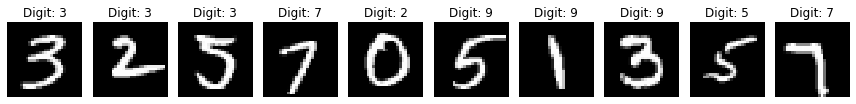

In [ ]:
#@title Plot Helper Functions 
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
   
def plot_classify(n_ex=10, dim=(1, 10), figsize=(12, 2)):
  idx = np.random.randint(0, X.shape[0], BATCH_SIZE)
  xs, ys = X[idx], Y[idx]
  plt.figure(figsize=figsize)
  for i in range(n_ex):
    x = np.reshape(xs[i], (784,))               
    predict = winner_net.activate(x)
    predict = np.argmax(predict)   
    plt.subplot(dim[0], dim[1], i+1)
    plt.title("Digit: %d" % predict)      
    plt.imshow((1-xs[i])*255, interpolation='nearest', cmap='gray_r')
    plt.axis('off')
  plt.tight_layout()
  plt.show()

plot_classify()

In [ ]:
#@title Draw Network from Genome
import graphviz

def draw_net(config, genome, view=False, filename=None, node_names=None, show_disabled=True, prune_unused=False,
             node_colors=None, fmt='svg'):
    """ Receives a genome and draws a neural network with arbitrary topology. """
    # Attributes for network nodes.
    if graphviz is None:
        print("This display is not available due to a missing optional dependency (graphviz)")
        return

    # If requested, use a copy of the genome which omits all components that won't affect the output.
    if prune_unused:
        genome = genome.get_pruned_copy(config.genome_config)

    if node_names is None:
        node_names = {}

    assert type(node_names) is dict

    if node_colors is None:
        node_colors = {}

    assert type(node_colors) is dict

    node_attrs = {
        'shape': 'circle',
        'fontsize': '9',
        'height': '0.2',
        'width': '0.2'}

    dot = graphviz.Digraph(format=fmt, node_attr=node_attrs)

    inputs = set()    
    for k in config.genome_config.input_keys:
        inputs.add(k)
        name = node_names.get(k, str(k))
        input_attrs = {'style': 'filled', 'shape': 'box', 'fillcolor': node_colors.get(k, 'lightgray')}
        dot.node(name, _attributes=input_attrs)

    outputs = set()    
    for k in config.genome_config.output_keys:
        outputs.add(k)
        name = node_names.get(k, str(k))
        node_attrs = {'style': 'filled', 'fillcolor': node_colors.get(k, 'lightblue')}

        dot.node(name, _attributes=node_attrs)

    used_nodes = set(genome.nodes.keys())    
    for n in used_nodes:
        if n in inputs or n in outputs:
            continue

        attrs = {'style': 'filled',
                 'fillcolor': node_colors.get(n, 'white')}
        dot.node(str(n), _attributes=attrs)

    for cg in genome.connections.values():
        if cg.enabled or show_disabled:
            # if cg.input not in used_nodes or cg.output not in used_nodes:
            #    continue
            print(cg.key)
            input, output = cg.key
            a = node_names.get(input, str(input))
            b = node_names.get(output, str(output))
            style = 'solid' if cg.enabled else 'dotted'
            color = 'green' if cg.weight > 0 else 'red'
            width = str(0.1 + abs(cg.weight / 5.0))
            dot.edge(a, b, _attributes={'style': style, 'color': color, 'penwidth': width})

    dot.render(filename, view=view)
    dot.view()

    return dot

node_names = {-1: 'X1', -2: 'X2', 0: 'Output'}
draw_net(config, winner, True, node_names=node_names, show_disabled=False)